# 01. Import Libraries

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Data

In [7]:
# Path to main folder
path = r'C:\Users\jmacs\Documents\Career Foundry Tasks\01-2024 Instacart Basket Analysis'

In [8]:
# Importing ords_prods_merge dataframe
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_complete.pkl'))

In [9]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,avg_days_since_last_order,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,9.0,Mid-range product,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,20.259259,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,9.0,Mid-range product,Least busy,Average Orders,10,New customer,6.367797,Low Spender,20.259259,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,9.0,Mid-range product,Least busy,Most Orders,10,New customer,6.367797,Low Spender,20.259259,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,9.0,Mid-range product,Least busy,Average Orders,10,New customer,6.367797,Low Spender,20.259259,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,9.0,Mid-range product,Least busy,Most Orders,10,New customer,6.367797,Low Spender,20.259259,Non-frequent customer


# 03. Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

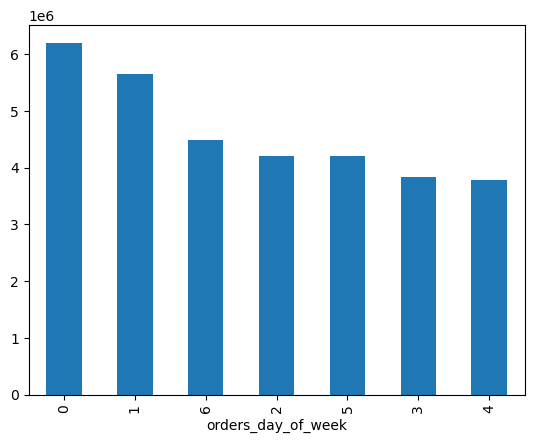

In [10]:
# creating bar chart for orders day of week
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

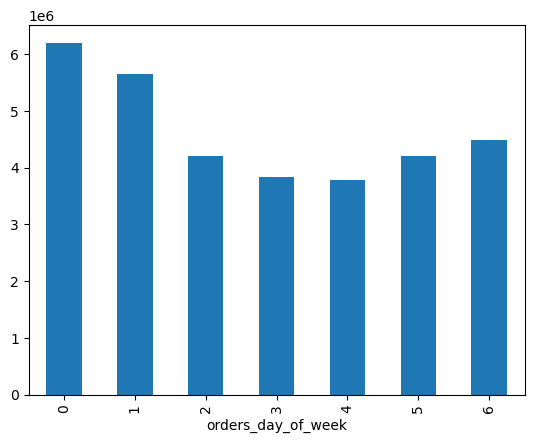

In [11]:
# using sort_index() to keep the order according to the index
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

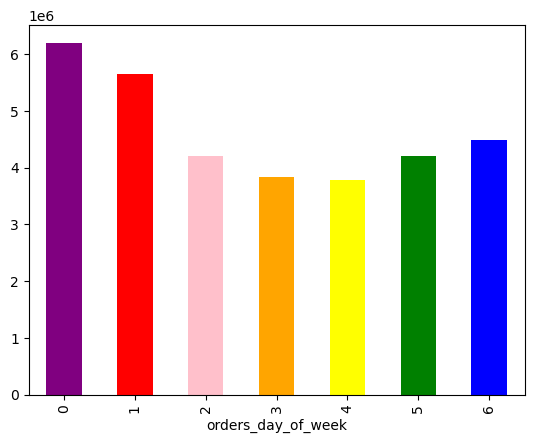

In [20]:
# making the chart with colors
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [6]:
# saving the bar chart to visualizations folder
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# 04. Histograms and Scatterplots

<Axes: ylabel='Frequency'>

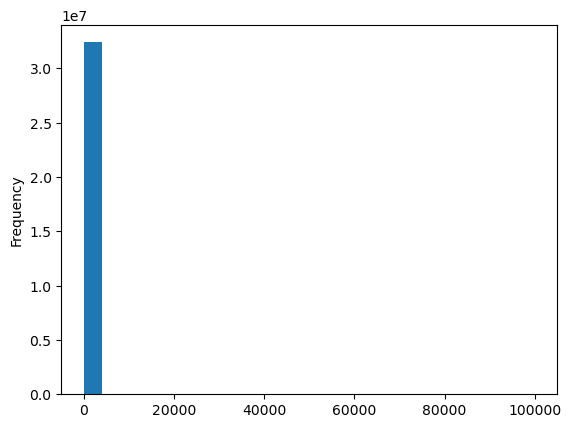

In [21]:
# creating histogram of prices column
ords_prods_merge['prices'].plot.hist(bins = 25)

In [22]:
# checking descriptive statistics for prices column
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [23]:
ords_prods_merge['prices'].mean()

11.980225638383454

In [24]:
ords_prods_merge['prices'].median()

7.4

In [25]:
# investigating shows a large outlier of price of $99,999
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

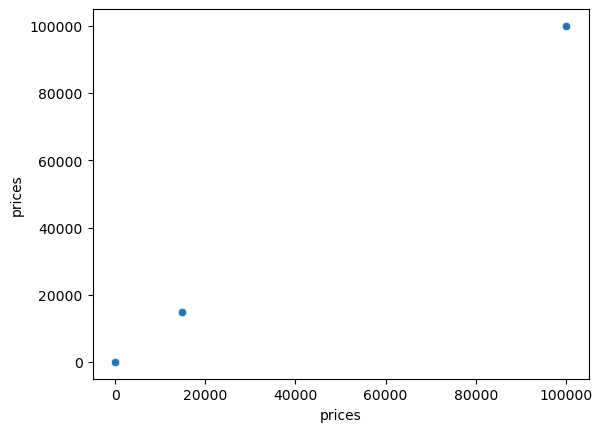

In [13]:
# creating a scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [26]:
# finding all item prices that are over $100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,department_id,prices,busiest_day,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,avg_days_since_last_order,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,16,14900.0,Regularly busy,Most Orders,40,Regular customer,108.648299,High Spender,8.268041,Frequent Customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,16,14900.0,Regularly busy,Most Orders,40,Regular customer,108.648299,High Spender,8.268041,Frequent Customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,16,14900.0,Regularly busy,Average Orders,4,New customer,1154.792308,High Spender,11.916667,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,16,14900.0,Busiest day,Average Orders,4,New customer,1154.792308,High Spender,11.916667,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,16,14900.0,Busiest day,Average Orders,16,Regular customer,114.426619,High Spender,20.106061,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,16,99999.0,Busiest day,Average Orders,39,Regular customer,1106.743956,High Spender,8.118644,Frequent Customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,16,99999.0,Busiest day,Most Orders,39,Regular customer,1106.743956,High Spender,8.118644,Frequent Customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,16,99999.0,Least busy,Most Orders,15,Regular customer,451.153540,High Spender,4.971292,Frequent Customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,16,99999.0,Least busy,Average Orders,12,Regular customer,1178.381871,High Spender,11.840491,Regular customer


In [12]:
# turning prices of over $100 to nulls
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [13]:
# checking new max of 'prices' column
ords_prods_merge['prices'].max()

25.0

In [14]:
# exporting orders_products_merge in pickle format
ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_complete.pkl'))

<Axes: ylabel='Frequency'>

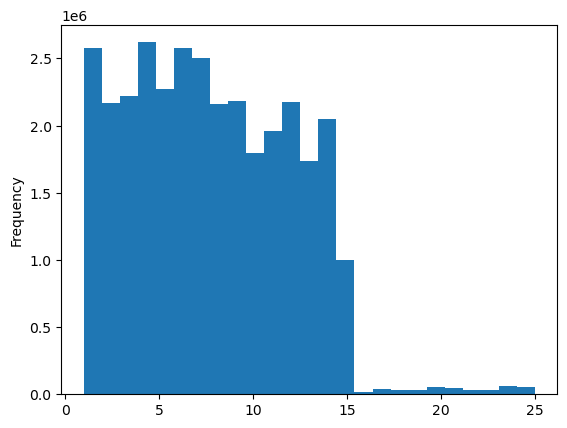

In [29]:
# new histogram with corrected prices
ords_prods_merge['prices'].plot.hist(bins = 25)

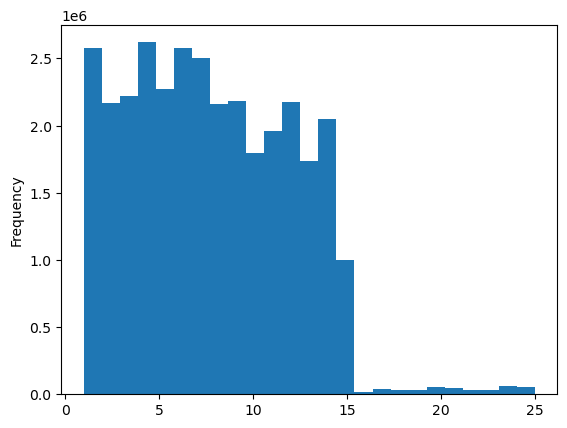

In [30]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

In [20]:
# saving the histogram to visualizations
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

# 05. Line Charts (sampling)

In [15]:
# creating a random seed for sampling
np.random.seed(4)

In [16]:
# creating a list holding True/False values to test np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [17]:
# store %70 of the sample in dataframe big
big = ords_prods_merge[dev]

In [18]:
# store 30% of the sample in dataframe small (tilde you see in the second line negates the argument, in other words, it stores everything that’s not dev, or False)
small = ords_prods_merge[~dev]

In [19]:
# checking length of dataframe
len(ords_prods_merge)

32404859

In [20]:
# checking length of big and small dataframe (should equal the same as the original dataframe)
len(big) + len(small)

32404859

In [21]:
# creating a dataframe from the small sample with only prices and orders of the week
df_2 = small[['orders_day_of_week','prices']]

C:\Users\jmacs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jmacs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


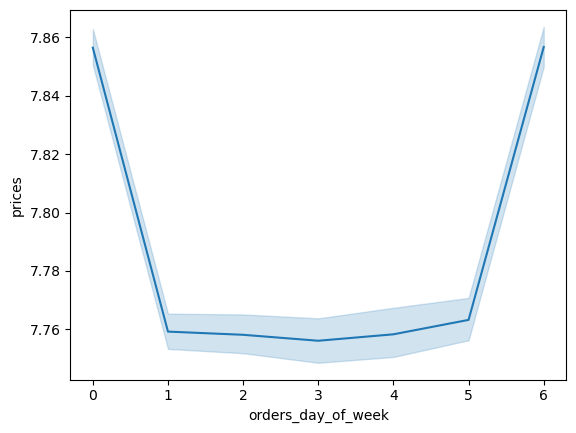

In [22]:
# creating a line chart with orders of the week and prices (blue bands = error bands, and they represent the chart’s confidence intervals)
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [23]:
# saving the line chart to visualizations
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dow.png'))